# U.S. Medical Insurance Costs
I have been supplied with a csv file containing details of medical insurance costs. 
I will explore this data and write some functions to help me understand and visualise the data.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv (r'insurance.csv')
%matplotlib inline

looking at the first few lines of the data and the data types present

In [31]:
print(data.head())
data.info()

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [32]:
#checking for null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values
There are 4 columns with numerical values and 3 categorical datatypes.
I'll plot the data in each column:

age


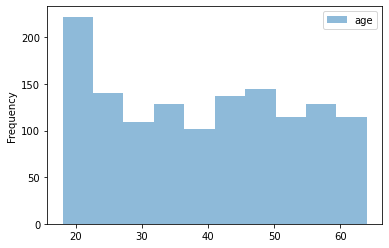

bmi


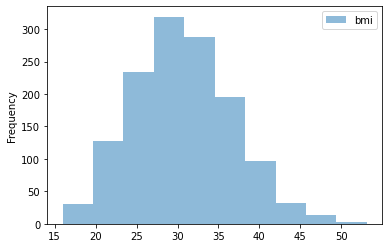

children


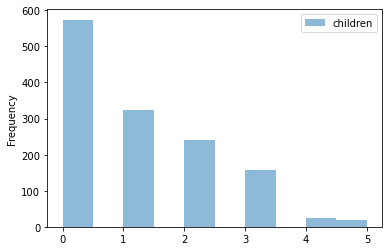

charges


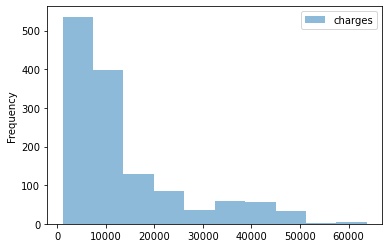

In [35]:
for col in data.select_dtypes(exclude=object).columns: 
    print(col)
    data[col].plot(kind='hist', legend=True, alpha=0.5)
    plt.show()

sex


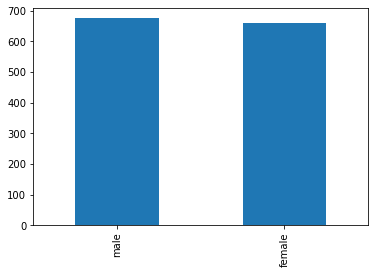

smoker


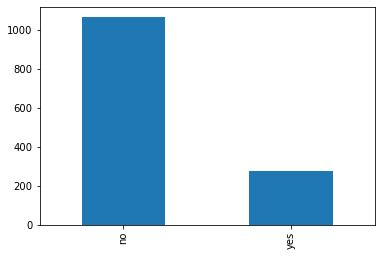

region


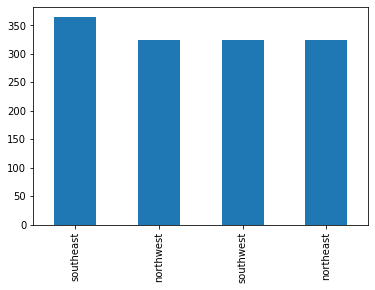

In [36]:
for col in data.select_dtypes(include=object).columns: 
    print(col)
    data[col].value_counts().plot(kind='bar')
    plt.show()

In [37]:
len(data.age.unique())

47

In [41]:
#I'm going to write a function to find the average cost of insurance for each age in the data set
def average_charge_per_age():
    charges_by_age = {}
    average_charges_by_age = {}
    for i in range(len(data)):
        if data.age[i] not in charges_by_age:
            charges_by_age[data.age[i]] = {'total_cost': data.charges[i], 'count':1}
        else:
            #print(f"cost before addition {charges_by_age[data.age[i]]['total_cost']}")
            charges_by_age[data.age[i]]['total_cost']+= data.charges[i]
            charges_by_age[data.age[i]]['count']+= 1
    for age in charges_by_age:
        total_cost = charges_by_age[age]['total_cost']
        count = charges_by_age[age]['count']
        av_cost = total_cost/count
        average_charges_by_age[age] = av_cost
        #print (f"the average insurance cost for a {age} year old is {av_cost}.") 
    return average_charges_by_age
        

In [42]:
print(average_charge_per_age())
D = average_charge_per_age()

{19: 9747.909334558823, 18: 7086.2175563623205, 28: 9069.187564285712, 33: 12351.53298730769, 32: 9220.300290769232, 31: 10196.98057333333, 46: 14342.590638620688, 37: 18019.9118772, 60: 21979.418507391303, 25: 9838.365310714287, 62: 19163.85657347826, 23: 12419.820039642855, 56: 15025.515836538463, 27: 12184.701721428573, 52: 18256.26971931034, 30: 12719.110358148147, 34: 11613.52812076923, 59: 18895.8695316, 63: 19884.998460869567, 55: 16164.54548846154, 22: 10012.932801785715, 26: 6133.825308571429, 35: 11307.182031200002, 24: 10648.015962142857, 41: 9653.745649629629, 38: 8102.733674, 36: 12204.476138, 21: 4730.464329642857, 48: 14632.50044517241, 40: 11772.251309999998, 58: 13878.928111599998, 53: 16020.930755000003, 43: 19267.27865333333, 64: 23275.530837272723, 20: 10159.697736206897, 61: 22024.45760869565, 44: 15859.396587037038, 57: 16447.185250000002, 29: 10430.158727037038, 45: 14830.199856206897, 54: 18758.546475357143, 49: 12696.006264285714, 47: 17653.99959310345, 51: 156

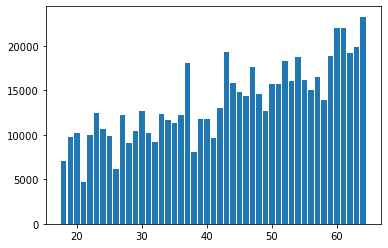

In [43]:
plt.bar(*zip(*D.items()))
plt.show()

Unsurprinsingly the price goes up as you get older.
Now I want to se if I can see if there is a sex difference in insurance cost for each age

In [46]:
def cost_diff_sex(ins_df):
    charges_by_sex = {}
    average_charges_by_sex = {}
    for i in range(len(ins_df)):
        if ins_df.sex[i] not in charges_by_sex:
            charges_by_sex[ins_df.sex[i]] = {'total_cost': ins_df.charges[i], 'count':1}
        else:
            #print(f"cost before addition {charges_by_age[data.age[i]]['total_cost']}")
            charges_by_sex[ins_df.sex[i]]['total_cost']+= ins_df.charges[i]
            charges_by_sex[ins_df.sex[i]]['count']+= 1
    for sex in charges_by_sex:
        total_cost = charges_by_sex[sex]['total_cost']
        count = charges_by_sex[sex]['count']
        av_cost = total_cost/count
        average_charges_by_sex[sex] = av_cost
        #print (f"the average insurance cost for a {age} year old is {av_cost}.") 
    return average_charges_by_sex

{'female': 12569.57884383534, 'male': 13956.751177721886}


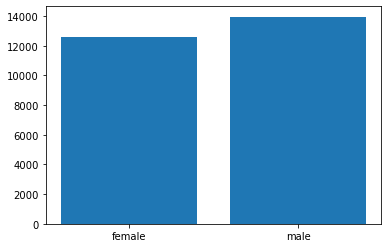

In [48]:

D = cost_diff_sex(data)
print(D)
plt.bar(*zip(*D.items()))
plt.show()

On average it looks like males pay more for insurance than females
Now I'll look to see how that is divided by age

In [137]:

def costs_by_age_and_sex(ins_df):
  
    #"""
    charges_by_age = {
        "under_20":{'female':{'total_cost':0, 'count':0}, 'male': {'total_cost':0, 'count':0}}, 
    "twenties":{'female':{'total_cost':0, 'count':0}, 'male':{'total_cost':0, 'count':0}},
     "thirties": {'female':{'total_cost':0, 'count':0}, 'male':{'total_cost':0, 'count':0}}, 
     "forties":{'female':{'total_cost':0, 'count':0}, 'male':{'total_cost':0, 'count':0}}, 
     "fifties":{'female':{'total_cost':0, 'count':0}, 'male':{'total_cost':0, 'count':0}},
     "sixty_plus":{'female':{'total_cost':0, 'count':0}, 'male':{'total_cost':0, 'count':0}}
     }

    average_charges_by_age = {
        "under_20":{'female':{}, 'male':{}}, 
        "twenties":{'female':{}, 'male':{}}, 
        "thirties": {'female':{}, 'male':{}}, 
        "forties":{'female':{}, 'male':{}}, 
        "fifties":{'female':{}, 'male':{}}, 
        "sixty_plus":{'female':{}, 'male':{}}
        }
    for i in range(len(ins_df)):
        if ins_df.age[i] < 20:
            charges_by_age["under_20"][ins_df.sex[i]]['total_cost']+= ins_df.charges[i]
            charges_by_age["under_20"][ins_df.sex[i]]['count'] += 1
        elif ins_df.age[i] < 30:
            charges_by_age["twenties"][ins_df.sex[i]]['total_cost']+= ins_df.charges[i]
            charges_by_age["twenties"][ins_df.sex[i]]['count'] += 1
        elif ins_df.age[i] < 40:
            charges_by_age["thirties"][ins_df.sex[i]]['total_cost']+= ins_df.charges[i]
            charges_by_age["thirties"][ins_df.sex[i]]['count'] += 1
        elif ins_df.age[i] < 50:
            charges_by_age["forties"][ins_df.sex[i]]['total_cost']+= ins_df.charges[i]
            charges_by_age["forties"][ins_df.sex[i]]['count'] += 1
        elif ins_df.age[i] < 60:
            charges_by_age["fifties"][ins_df.sex[i]]['total_cost']+= ins_df.charges[i]
            charges_by_age["fifties"][ins_df.sex[i]]['count'] += 1
        else:
            charges_by_age["sixty_plus"][ins_df.sex[i]]['total_cost']+= ins_df.charges[i]
            charges_by_age["sixty_plus"][ins_df.sex[i]]['count'] += 1
    return charges_by_age


In [143]:
def plot_costs_by_age_and_sex(ins_df):
    average_charges_by_age = {
        "under_20":{'female':{}, 'male':{}}, 
        "twenties":{'female':{}, 'male':{}}, 
        "thirties": {'female':{}, 'male':{}}, 
        "forties":{'female':{}, 'male':{}}, 
        "fifties":{'female':{}, 'male':{}}, 
        "sixty_plus":{'female':{}, 'male':{}}}
    
    costs_age_sex = costs_by_age_and_sex(ins_df)
    for age_range in costs_age_sex:
        female_total_cost = costs_age_sex[age_range]['female']['total_cost']
        female_count = costs_age_sex[age_range]['female']['count']
        female_av_cost = female_total_cost/female_count
       # print (f' for the age range {age_range} the average insurance_cost for females is ${female_av_cost:.2f}')
       
        male_total_cost = costs_age_sex[age_range]['male']['total_cost']
        male_count = costs_age_sex[age_range]['male']['count']
        male_av_cost = male_total_cost/male_count
        #print (f' for the age range {age_range} the average insurance_cost for males is ${male_av_cost:.2f}')

        average_charges_by_age[age_range]['female']=female_av_cost
        average_charges_by_age[age_range]['male']=male_av_cost
    
    #plt.bar(*zip(*average_charges_by_age.items()))
    #plt.show()
    return average_charges_by_age

    


In [172]:
D = plot_costs_by_age_and_sex(data)
#print(D)
#plt.bar(*zip(*D.items()))
#plt.show()
L = list(D.items())
D.items()
#plt.show()

print(L[0])
print(D.)

('under_20', {'female': 8067.0287015, 'male': 8723.703547042254})
{'under_20': {'female': 8067.0287015, 'male': 8723.703547042254}, 'twenties': {'female': 8801.551506222228, 'male': 10269.522977310346}, 'thirties': {'female': 10425.816643622045, 'male': 13021.452341692313}, 'forties': {'female': 13907.045329640283, 'male': 14887.846382142861}, 'fifties': {'female': 15778.785439562049, 'male': 17227.719753656715}, 'sixty_plus': {'female': 20372.00391724138, 'male': 22155.326208571427}}


           under_20      twenties      thirties       forties       fifties  \
female  8067.028702   8801.551506  10425.816644  13907.045330  15778.785440   
male    8723.703547  10269.522977  13021.452342  14887.846382  17227.719754   

          sixty_plus  
female  20372.003917  
male    22155.326209  


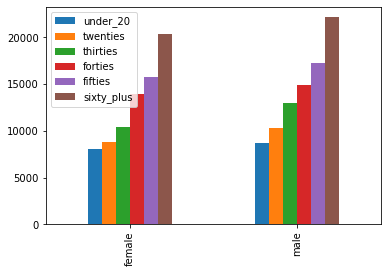

In [180]:
df_D = pd.DataFrame.from_dict(D)
print(df_D.head())
df_D.plot.bar()
plt.show()

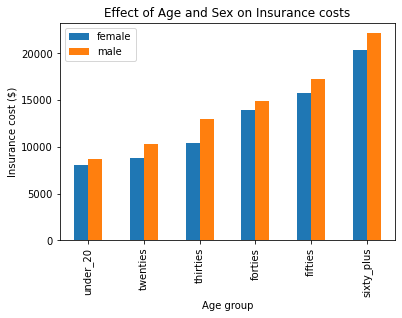

In [187]:
by_age_df = df_D.transpose()
by_age_df.plot.bar()
plt.title("Effect of Age and Sex on Insurance costs")
plt.ylabel("Insurance cost ($)")
plt.xlabel("Age group")
plt.show()


{'southwest': 325, 'southeast': 364, 'northwest': 325, 'northeast': 324}


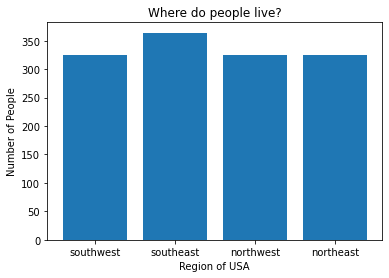

In [195]:
def where_are_people_from(df):
    """ A function to find where the people in the data set are most commonly from
    """
    regions = {}
    for i in range(len(df)):
        region = df.region[i]
        if region not in regions:
            regions[region]= 1
        else:
            regions[region]+=1
    return regions

regions = where_are_people_from(data)
print(where_are_people_from(data))
plt.bar(*zip(*regions.items()))
plt.title("Where do people live?")
plt.ylabel("Number of People")
plt.xlabel("Region of USA")
plt.show()


In [ ]:
def 